In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Two classes
X = np.array([
    [2, 3], [3, 3], [3, 2],    # Class +1
    [6, 5], [7, 7], [8, 6]     # Class -1
])

y = np.array([1, 1, 1, -1, -1, -1])

ValueError: x and y must be the same size

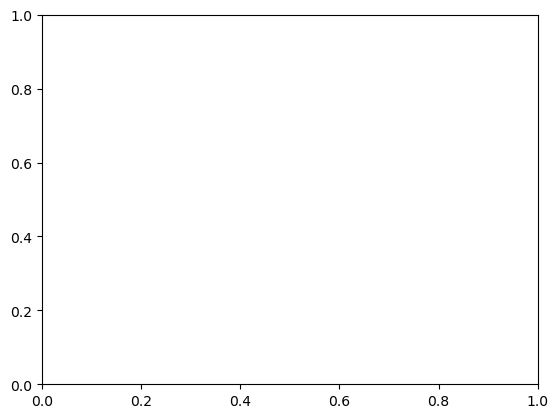

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
class SVM:
    def __init__(self, lr=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y[idx] * x_i)
                    self.b += self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)
